<a href="https://colab.research.google.com/github/paulosalvatore/Ocean_CienciaDados_24_02_2021/blob/main/TSE_Ocean_CienciaDados_24_02_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

sigla_uf = 'AM'

nome_arquivo = f'receitas_candidatos_2018_{sigla_uf}.csv'
url_arquivo = f'https://raw.githubusercontent.com/paulosalvatore/Ocean_CienciaDados_24_02_2021/main/receitas_candidatos/{nome_arquivo}'

df = pd.read_csv(url_arquivo, sep=';', encoding='latin-1', decimal=',')

In [2]:
df

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,DT_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,SG_UF,SG_UE,NM_UE,NR_CNPJ_PRESTADOR_CONTA,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NR_CPF_VICE_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,CD_FONTE_RECEITA,DS_FONTE_RECEITA,CD_ORIGEM_RECEITA,DS_ORIGEM_RECEITA,CD_NATUREZA_RECEITA,DS_NATUREZA_RECEITA,CD_ESPECIE_RECEITA,DS_ESPECIE_RECEITA,CD_CNAE_DOADOR,DS_CNAE_DOADOR,NR_CPF_CNPJ_DOADOR,NM_DOADOR,NM_DOADOR_RFB,CD_ESFERA_PARTIDARIA_DOADOR,DS_ESFERA_PARTIDARIA_DOADOR,SG_UF_DOADOR,CD_MUNICIPIO_DOADOR,NM_MUNICIPIO_DOADOR,SQ_CANDIDATO_DOADOR,NR_CANDIDATO_DOADOR,CD_CARGO_CANDIDATO_DOADOR,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
0,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,422492980,AM,AM,AMAZONAS,31208328000121,5,Senador,40000610064,222,ALFREDO PEREIRA DO NASCIMENTO,5727600430,11825987653,22,PR,Partido da República,0,Fundo Partidario,10030200,Rendimentos de aplicações financeiras,1,Financeiro,16,--,-1,#NULO#,-1,#NULO#,#NULO#,#NULO#,#NULO#,#NULO#,-1,#NULO#,-1,-1,-1,#NULO#,-1,#NULO#,#NULO#,#NULO#,#NULO#,12519793,31/08/2018,S PUBLICO SUPREMO,116.33
1,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,422492980,AM,AM,AMAZONAS,31208328000121,5,Senador,40000610064,222,ALFREDO PEREIRA DO NASCIMENTO,5727600430,11825987653,22,PR,Partido da República,2,Fundo Especial,10030200,Rendimentos de aplicações financeiras,1,Financeiro,16,--,-1,#NULO#,-1,#NULO#,#NULO#,#NULO#,#NULO#,#NULO#,-1,#NULO#,-1,-1,-1,#NULO#,-1,#NULO#,#NULO#,#NULO#,#NULO#,12519790,30/09/2018,S PUBLICO SUPREMO,3.63
2,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,422492980,AM,AM,AMAZONAS,31208328000121,5,Senador,40000610064,222,ALFREDO PEREIRA DO NASCIMENTO,5727600430,11825987653,22,PR,Partido da República,2,Fundo Especial,10030200,Rendimentos de aplicações financeiras,1,Financeiro,16,--,-1,#NULO#,-1,#NULO#,#NULO#,#NULO#,#NULO#,#NULO#,-1,#NULO#,-1,-1,-1,#NULO#,-1,#NULO#,#NULO#,#NULO#,#NULO#,12519789,31/08/2018,S PUBLICO SUPREMO,324.64
3,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,422492980,AM,AM,AMAZONAS,31208328000121,5,Senador,40000610064,222,ALFREDO PEREIRA DO NASCIMENTO,5727600430,11825987653,22,PR,Partido da República,1,Outros Recursos,10010200,Recursos de pessoas físicas,0,Estimável,2,Estimado,-1,#NULO#,2610248253,WILSON WOLTER FILHO,WILSON WOLTER FILHO,#NULO#,#NULO#,#NULO#,-1,#NULO#,-1,-1,-1,#NULO#,-1,#NULO#,#NULO#,002220500000AM000004E,#NULO#,12519791,10/09/2018,ASSESSORIA DE CAMPANHA NO PERIODO DE 10/09 A 0...,3000.00
4,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,28/10/2019,422492980,AM,AM,AMAZONAS,31208328000121,5,Senador,40000610064,222,ALFREDO PEREIRA DO NASCIMENTO,5727600430,11825987653,22,PR,Partido da República,2,Fundo Especial,10040000,Recursos de outros candidatos,0,Estimável,2,Estimado,94928,Atividades de organizações políticas,31207839000129,AMAZONINO ARMANDO MENDES,ELEICAO 2018 AMAZONINO ARMANDO MENDES GOVERNADOR,#NULO#,#NULO#,AM,-1,#NULO#,40000610067,12,3,Governador,12,PDT,Partido Democrático Trabalhista,002220500000AM000009E,#NULO#,12519786,05/10/2018,FRETAMENTO DE VOO CONFORME FATURA EM ANEXO,6750.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305,11/03/2020,01:27:32,2018,2,Ordinária,297,Eleição Geral Federal 2018,07/10/2018,1,Final,06/11/2018,422517069,AM,AM,AMAZONAS,31215279000154,7,Deputado Estadual,40000612643,11111,MAYARA MONIQUE FIGUEIREDO PINHEIRO,7726770228

In [3]:
colunas = ['SQ_CANDIDATO', 'NM_CANDIDATO', 'VR_RECEITA']
df_filtrado = df[colunas]

In [4]:
len(df_filtrado.SQ_CANDIDATO.unique())

684

In [5]:
len(df_filtrado.NM_CANDIDATO.unique())

684

In [6]:
group = df_filtrado.groupby(['SQ_CANDIDATO', 'NM_CANDIDATO'])

group.SQ_CANDIDATO.count()

SQ_CANDIDATO  NM_CANDIDATO                     
40000600835   SIDNEY VEIGA CABRAL                   9
40000600837   JOSÉ EVANDRO DE OLIVEIRA              3
40000600838   CARLOS VANDIO GOMES DE ARAUJO         3
40000602401   LUIZ FERNANDO DE SOUZA SANTOS        10
40000602404   ALEXANDRE MACHADO MAIA                9
                                                   ..
40000629651   RAMUNDO NONATO DA SILVA BARBOSA       6
40000629719   AUGUSTO CEZAR SILVA DE MENEZES        1
40000629720   SERGIO RAIMUNDO ERNESTO MACHADO       1
40000629721   MARIA NATALI DA SILVA VASCONCELOS     6
40000629874   MÁRCIA REGINA GONDIM DÔCE             4
Name: SQ_CANDIDATO, Length: 684, dtype: int64

In [7]:
group_sum = group.VR_RECEITA.sum()

group_sum

SQ_CANDIDATO  NM_CANDIDATO                     
40000600835   SIDNEY VEIGA CABRAL                    3750.00
40000600837   JOSÉ EVANDRO DE OLIVEIRA                475.00
40000600838   CARLOS VANDIO GOMES DE ARAUJO           600.00
40000602401   LUIZ FERNANDO DE SOUZA SANTOS         13451.94
40000602404   ALEXANDRE MACHADO MAIA                  783.24
                                                     ...    
40000629651   RAMUNDO NONATO DA SILVA BARBOSA        2890.00
40000629719   AUGUSTO CEZAR SILVA DE MENEZES         1000.00
40000629720   SERGIO RAIMUNDO ERNESTO MACHADO        2000.00
40000629721   MARIA NATALI DA SILVA VASCONCELOS      3000.00
40000629874   MÁRCIA REGINA GONDIM DÔCE            126750.00
Name: VR_RECEITA, Length: 684, dtype: float64

In [8]:
target = group_sum.nlargest(10)

target

SQ_CANDIDATO  NM_CANDIDATO                           
40000610067   AMAZONINO ARMANDO MENDES                   6993949.09
40000603709   OMAR JOSE ABDEL AZIZ                       3708335.55
40000610064   ALFREDO PEREIRA DO NASCIMENTO              2709475.62
40000618261   CARLOS EDUARDO DE SOUZA BRAGA              2624230.54
40000608897   MARIA DA CONCEIÇÃO SAMPAIO MOURA           2131609.60
40000610407   ATILA SIDNEY LINS ALBUQUERQUE              2029855.21
40000627725   VANESSA GRAZZIOTIN                         2005239.76
40000610391   WILSON MIRANDA LIMA                        1932820.00
40000618309   GEDEAO TIMOTEO AMORIM                      1842092.05
40000604136   DAVID ANTONIO ABISAI PEREIRA DE ALMEIDA    1840068.29
Name: VR_RECEITA, dtype: float64

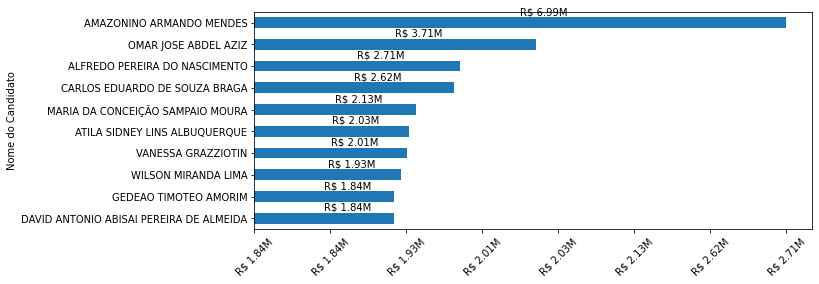

In [9]:
def formatar_valor(valor):
  return f'R$ {valor / 1000000:.2f}M'


import matplotlib.pyplot as plt

target_cleared = target.reset_index('SQ_CANDIDATO', drop=True).sort_values(ascending=True)

target_formatado = target_cleared.map(formatar_valor)

fig = plt.figure(figsize=(10, 4))
graph = target_cleared.plot.barh(figure=fig)

graph.set_ylabel('Nome do Candidato')
graph.set_xticklabels(target_formatado.values, rotation=45)

x_offset = 0
y_offset = 0.1

for index, rectangle in enumerate(graph.patches):
  box = rectangle.get_bbox()

  vr_receita = target_formatado.values[index]
  
  graph.annotate(vr_receita, ((box.x0 + box.x1) / 2 + x_offset, box.y1 + y_offset))

plt.locator_params(nbins=10)
plt.show()